In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("/HateSpeech_Kenya.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hate_speech         48076 non-null  int64 
 1   offensive_language  48076 non-null  int64 
 2   neither             48076 non-null  int64 
 3   Class               48076 non-null  int64 
 4   Tweet               48076 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.8+ MB


# New Section

In [2]:
df.head()

,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,['The political elite are in desperation. Ordi...
1,0,0,3,0,"[""Am just curious the only people who are call..."
2,0,0,3,0,['USERNAME_3 the area politicians are the one ...
3,0,0,3,0,['War expected in Nakuru if something is not d...
4,0,0,3,0,['USERNAME_4 tells kikuyus activists that they...


In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Remove non-ASCII characters
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))

In [4]:
# Remove HTML tags and punctuations
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'<.*?>', ' ', x))
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [5]:
# Lowercase all messages
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())

In [6]:
# Remove emoticons
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'(:|;|=)(-)?(\)|\(|D|P)', ' ', x))

In [7]:
#Import the Natural Language Toolkit (nltk) library
import nltk
# Download the 'punkt' tokenizer model from nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Tokenize the text in the 'Tweet' column using nltk's word_tokenize function
# This step breaks down each sentence into a list of words
# Assuming 'Tweet' column contains lists of words
df['Tweet'] = df['Tweet'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
df.head()

,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,"[the, political, elite, are, in, desperation, ..."
1,0,0,3,0,"[am, just, curious, the, only, people, who, ar..."
2,0,0,3,0,"[username_3, the, area, politicians, are, the,..."
3,0,0,3,0,"[war, expected, in, nakuru, if, something, is,..."
4,0,0,3,0,"[username_4, tells, kikuyus, activists, that, ..."


In [9]:
# Download the NLTK stopwords dataset.
# This dataset includes a list of common English stopwords that are often removed during text processing.
# Running this command downloads the stopwords data if it's not already available on your system.
nltk.download('stopwords')
# Import the stopwords module from NLTK.
from nltk.corpus import stopwords
# Create a set of English stopwords.
# Stopwords are common words (e.g., 'the', 'is', 'and') that are often removed from text data during analysis.
stop_words = set(stopwords.words('english'))
# Apply text preprocessing to the 'Tweet' column in the DataFrame.
# The lambda function removes non-alphanumeric characters and stopwords from each tweet.
df['Tweet'] = df['Tweet'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df.head()

,hate_speech,offensive_language,neither,Class,Tweet
0,0,0,3,0,"[political, elite, desperation, ordinary, kale..."
1,0,0,3,0,"[curious, people, calling, old, mad, kikuyus, ..."
2,0,0,3,0,"[area, politicians, one, blame, coz, r, insiti..."
3,0,0,3,0,"[war, expected, nakuru, something, done, luos,..."
4,0,0,3,0,"[tells, kikuyus, activists, targeted, targette..."


In [11]:
from nltk.stem import PorterStemmer
# Stemming using NLTK's PorterStemmer
# Initialize the PorterStemmer from NLTK
porter_stemmer = PorterStemmer()

# Define a new column 'text_stemmed' in the DataFrame to store the stemmed text
# Apply stemming using NLTK's PorterStemmer to each element in the 'Tweet' column
df['text_stemmed'] = df['Tweet'].apply(lambda x: [porter_stemmer.stem(word) for word in x])

In [12]:
df.head()

,hate_speech,offensive_language,neither,Class,Tweet,text_stemmed
0,0,0,3,0,"[political, elite, desperation, ordinary, kale...","[polit, elit, desper, ordinari, kalenjin, susp..."
1,0,0,3,0,"[curious, people, calling, old, mad, kikuyus, ...","[curiou, peopl, call, old, mad, kikuyu, kalenj..."
2,0,0,3,0,"[area, politicians, one, blame, coz, r, insiti...","[area, politician, one, blame, coz, r, insit, ..."
3,0,0,3,0,"[war, expected, nakuru, something, done, luos,...","[war, expect, nakuru, someth, done, luo, given..."
4,0,0,3,0,"[tells, kikuyus, activists, targeted, targette...","[tell, kikuyu, activist, target, target, want,..."


In [13]:
# Import the WordNetLemmatizer from the nltk library
from nltk.stem import WordNetLemmatizer
# Download the WordNet dataset needed for lemmatization
nltk.download('wordnet')
# Create a WordNetLemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()
# Lemmatize the 'Tweet' column in the DataFrame using NLTK's WordNetLemmatizer
# Lemmatization reduces words to their base or root form
# This can improve the performance of natural language processing tasks
# The result is stored in a new column 'text_lemmatized'
df['text_lemmatized'] = df['Tweet'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
df.head()

,hate_speech,offensive_language,neither,Class,Tweet,text_stemmed,text_lemmatized
0,0,0,3,0,"[political, elite, desperation, ordinary, kale...","[polit, elit, desper, ordinari, kalenjin, susp...","[political, elite, desperation, ordinary, kale..."
1,0,0,3,0,"[curious, people, calling, old, mad, kikuyus, ...","[curiou, peopl, call, old, mad, kikuyu, kalenj...","[curious, people, calling, old, mad, kikuyus, ..."
2,0,0,3,0,"[area, politicians, one, blame, coz, r, insiti...","[area, politician, one, blame, coz, r, insit, ...","[area, politician, one, blame, coz, r, insitin..."
3,0,0,3,0,"[war, expected, nakuru, something, done, luos,...","[war, expect, nakuru, someth, done, luo, given...","[war, expected, nakuru, something, done, luo, ..."
4,0,0,3,0,"[tells, kikuyus, activists, targeted, targette...","[tell, kikuyu, activist, target, target, want,...","[tell, kikuyus, activist, targeted, targetted,..."


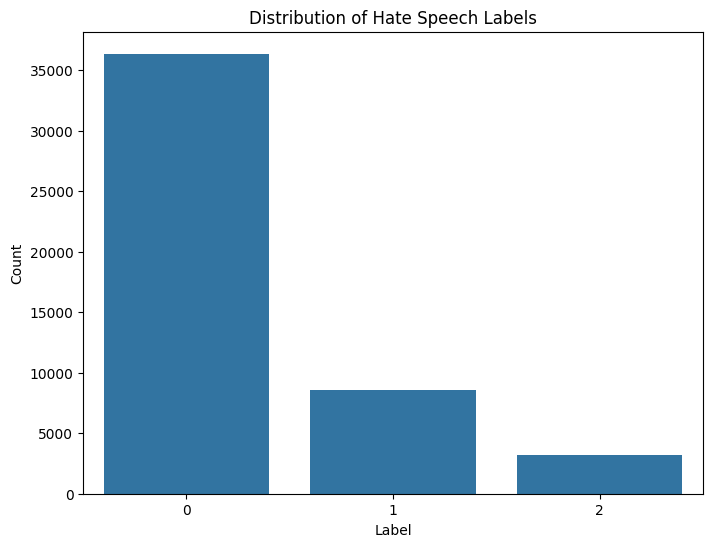

In [15]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for statistical data visualization

# Create a figure with a specific size for better visibility
plt.figure(figsize=(8, 6))
# Use Seaborn's countplot to visualize the distribution of labels in the 'Class' column
sns.countplot(x='Class', data=df)
# Set plot title and axis labels for better interpretation
plt.title('Distribution of Hate Speech Labels')
plt.xlabel('Label')
plt.ylabel('Count')
# Display the plot
plt.show()

In [24]:
# Word frequency analysis

from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer()
word_freq = vectorizer.fit_transform(df['Tweet'].apply(lambda x: ' '.join(x)))
word_freq = pd.DataFrame(word_freq.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_sum = word_freq.sum(axis=0)
word_freq_sum = word_freq_sum.sort_values(ascending=False)

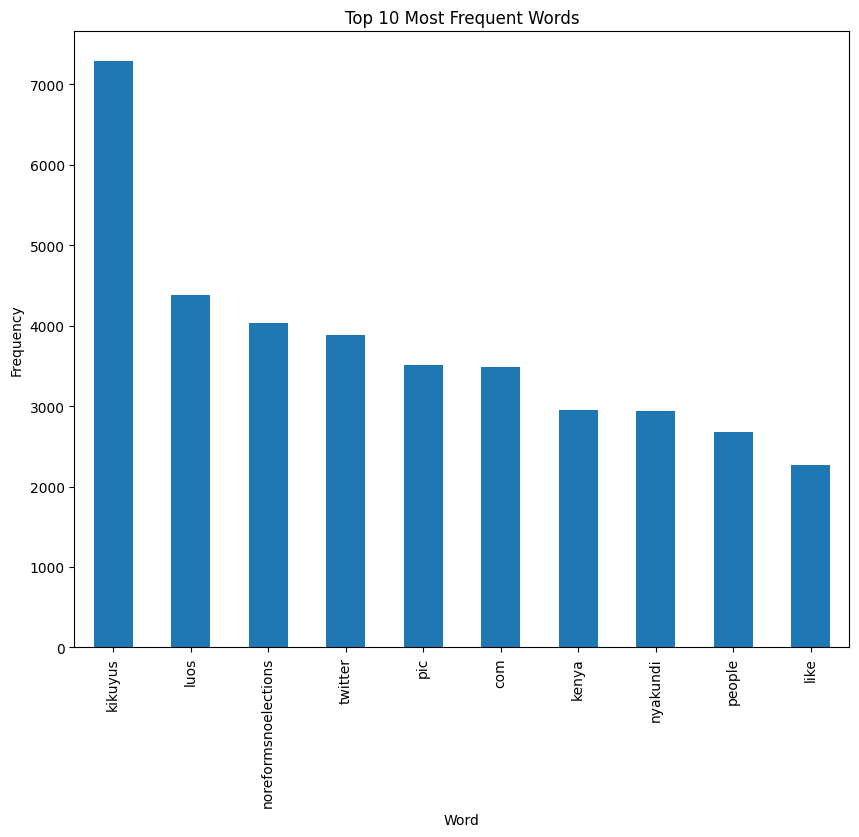

In [30]:
top_words = word_freq_sum.head(10)
plt.figure(figsize=(10, 8))
top_words.plot(kind='bar')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


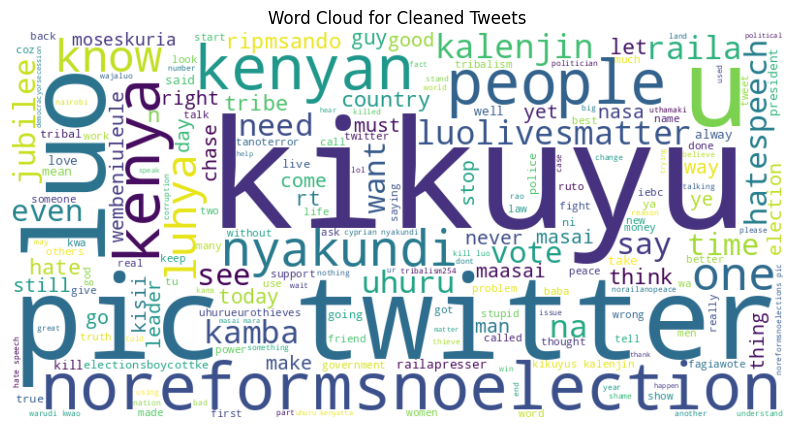

In [29]:
# convert 'Tweet' column lists of words, to strings, store in a new column,'Cleaned_Tweet'
df['Cleaned_Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))
from wordcloud import WordCloud
# Create a WordCloud for the 'Tweet' column
clean_text = ' '.join(df['Cleaned_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Tweets')
plt.show()